In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# Parameters
l = 1.6  # L
dr = 0.15  # Distance between ears
theta = (18 / 180) * np.pi  # Half the speaker span
l1 = np.sqrt(l**2 + (dr / 2)**2 - (dr * l * np.sin(theta / 2)))  # L1
l2 = np.sqrt(l**2 + (dr / 2)**2 + (dr * l * np.sin(theta / 2)))  # L2
g = l1 / l2  # g
cs = 340.3  # Speed of sound
dl = abs(l2 - l1)  # Distance difference
tc = dl / cs  # Time delay
tc = 65e-6  # Time delay for a normal listening room
g = 0.985

In [3]:
# Frequency and omega
f = np.arange(1, 24001, 1)
w = 2 * np.pi * f

$$
\begin{align}
S^{[P]}_{\text{si}_{||}}(\omega) &= |H_{LL}(i \omega)| = |H_{RR}(i \omega)| = |\frac{1}{1-g^2e^{-2i\omega \tau_c}}|\\
S^{[P]}_{\text{si}_X}(\omega) &= |H_{LR}(i \omega)| = |H_{RL}(i \omega)| = |\frac{-ge^{-i\omega \tau_c}}{1-g^2e^{-2i\omega \tau_c}}|\\
S^{[P]}_{\text{ci}_{||}}(\omega) &= \frac{1}{2}|1-\frac{g}{g+e^{i\omega \tau_c}}| = \frac{|H_{LL}(i \omega)| + |H_{LR}(i \omega)|}{2} = \frac{|H_{RL}(i \omega)| + |H_{RR}(i \omega)|}{2} \\
S_i(\omega) &= |H_{LL}(i \omega)| + |H_{LR}(i \omega)| = |H_{RL}(i \omega)| + |H_{RR}(i \omega)| \\
S_o(\omega) &= |H_{LL}(i \omega)| - |H_{LR}(i \omega)| = |H_{RL}(i \omega)| - |H_{RR}(i \omega)| \\
\hat{S}^{[P]}(\omega) &= \text{max}[S_i(\omega), S_o(\omega)] = \text{max}(|1-\frac{g}{g+e^{i\omega \tau_c}}|,|1+\frac{g}{e^{i \omega \tau_c}-g}|)\\
\chi(\omega) &= \frac{|R_{LL}(i \omega)|}{|R_{RL}(i \omega)|} = \frac{|R_{RR}(i \omega)|}{|R_{LR}(i \omega)|} = \frac{E_{\text{si}_{||}}(\omega)}{E_{\text{si}_X}(\omega)} \\
\end{align}
$$

In [4]:
# Calculate spectral amplitudes
S_si_ipsi = 1 / np.sqrt(g**4 - 2 * g**2 * np.cos(2 * w * tc) + 1)  # Side image at ipsi ear
S_si_cont = g / np.sqrt(g**4 - 2 * g**2 * np.cos(2 * w * tc) + 1)  # Side image at cont ear
S_ci = 1 / (2 * np.sqrt(g**2 + 2 * g * np.cos(w * tc) + 1))  # Center image
S_hat = np.maximum(
    1 / np.sqrt(g**2 + 2 * g * np.cos(w * tc) + 1), # in-phase
    1 / np.sqrt(g**2 - 2 * g * np.cos(w * tc) + 1)  # out-of-phase
)  # Maximum spectral amplitude at the loudspeaker

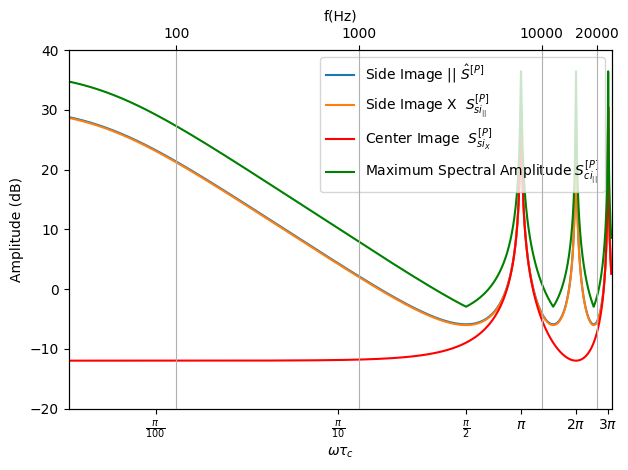

In [5]:
# Plotting
fig, ax1 = plt.subplots()

# Primary x-axis (w*tc)
ax1.plot(w * tc, 20 * np.log10(S_si_ipsi),  label='Side Image || $\hat{S}^{[P]}$ ')
ax1.plot(w * tc, 20 * np.log10(S_si_cont),  label='Side Image X  $S^{[P]}_{{si}_{||}}$')
ax1.plot(w * tc, 20 * np.log10(S_ci), 'r',  label='Center Image  $S^{[P]}_{{si}_X}$')
ax1.plot(w * tc, 20 * np.log10(S_hat), 'g', label='Maximum Spectral Amplitude $S^{[P]}_{{ci}_{||}}$')
ax1.set_xlabel(r'$\omega \tau_c$')
ax1.set_xscale('log')
ax1.set_xlim(np.pi / 300, np.pi * np.pi)  # Set limits for primary x-axis
ax1.set_xticks([np.pi / 100, np.pi / 10, np.pi / 2, np.pi, 2 * np.pi, 3 * np.pi])
ax1.set_xticklabels([r'$\frac{\pi}{100}$', r'$\frac{\pi}{10}$', r'$\frac{\pi}{2}$', r'$\pi$', r'$2\pi$', r'$3\pi$'])
ax1.set_ylabel('Amplitude (dB)')
ax1.legend(loc='upper right')

# Calculate corresponding frequency ticks
freq_ticks = [100, 1000, 10000, 20000]
omega_tc_ticks = [2 * np.pi * f * tc for f in freq_ticks]

# Secondary x-axis (frequency f)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # Align with primary x-axis
ax2.set_xscale('log')
ax2.set_xticks(omega_tc_ticks)  # Major ticks
ax2.set_xticklabels([str(f) for f in freq_ticks])
ax2.set_xlabel('f(Hz)')

# Remove minor ticks on ax1 x-axes
ax1.tick_params(axis='x', which='minor', bottom=False)
ax2.tick_params(axis='x', which='minor', top=False)

plt.grid()
plt.ylim(-20, 40)
plt.tight_layout()
plt.show()

$$
\begin{align}
H^{|B=0|} = H^{|P|} &= [{C^H C}]^{-1} C^H \\
C &= 
\begin{bmatrix}
1 & ge^{-iwt} \\
ge^{-iwt} & 1 \\
\end{bmatrix} \\
C^H &= 
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
CC^H &= 
\begin{bmatrix}
1+g^2 & g(e^{-iwt}+e^{iwt}) \\
g(e^{-iwt}+e^{iwt}) & 1+g^2 \\
\end{bmatrix} \\
(CC^H)^{-1}C^H &= 
\frac{1}{(1+g^2)^2 - g^2(e^{-iwt}+e^{iwt})^2}
\begin{bmatrix}
1+g^2 & -g(e^{-iwt}+e^{iwt}) \\
-g(e^{-iwt}+e^{iwt}) & 1+g^2 \\
\end{bmatrix}
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
&= 
\frac{1}{(1+2g^2+g^4) - g^2(e^{-2iwt}+e^{2iwt}+2)}
\begin{bmatrix}
1+g^2 & -g(e^{-iwt}+e^{iwt}) \\
-g(e^{-iwt}+e^{iwt}) & 1+g^2 \\
\end{bmatrix}
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
&=
\frac{1}{1 + g^4 - g^2e^{-2iwt} - g^2e^{2iwt}}
\begin{bmatrix}
1+g^2 & -g(e^{-iwt}+e^{iwt}) \\
-g(e^{-iwt}+e^{iwt}) & 1+g^2 \\
\end{bmatrix}
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
&=
\frac{1}{1 + g^4e^{-2iwt}e^{2iwt} - g^2e^{-2iwt} - g^2e^{2iwt}}
\begin{bmatrix}
1+g^2 & -g(e^{-iwt}+e^{iwt}) \\
-g(e^{-iwt}+e^{iwt}) & 1+g^2 \\
\end{bmatrix}
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
&=
\frac{1}{(1 - g^2e^{-2iwt})(1 - g^2e^{2iwt})}
\begin{bmatrix}
1+g^2 & -g(e^{-iwt}+e^{iwt}) \\
-g(e^{-iwt}+e^{iwt}) & 1+g^2 \\
\end{bmatrix}
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
&=
\frac{1}{(1 - g^2e^{-2iwt})(1 - g^2e^{2iwt})}
\begin{bmatrix}
1+g^2-g^2(1+e^{2iwt}) & ge^{iwt}+g^3e^{iwt}-g(e^{-iwt}+e^{iwt}) \\
ge^{iwt}+g^3e^{iwt}-g(e^{-iwt}+e^{iwt}) & 1+g^2-g^2(1+e^{2iwt}) \\
\end{bmatrix} \\
&=
\frac{1}{(1 - g^2e^{-2iwt})(1 - g^2e^{2iwt})}
\begin{bmatrix}
1-g^2e^{2iwt} & g^3e^{iwt} - ge^{-iwt} \\
g^3e^{iwt} - ge^{-iwt} & 1-g^2e^{2iwt} \\
\end{bmatrix} \\
&=
\frac{1}{(1 - g^2e^{-2iwt})(1 - g^2e^{2iwt})}
(1-g^2e^{2iwt})
\begin{bmatrix}
1 & -ge^{-iwt} \\
-ge^{-iwt} & 1 \\
\end{bmatrix} \\
&=
\frac{1}{(1 - g^2e^{-2iwt})}
\begin{bmatrix}
1 & -ge^{-iwt} \\
-ge^{-iwt} & 1 \\
\end{bmatrix} \\
\end{align} 
$$

$$
\begin{align}
H^{|B|} &= [{C^H C}+\beta I]^{-1} C^H \\
C &= 
\begin{bmatrix}
1 & ge^{-iwt} \\
ge^{-iwt} & 1 \\
\end{bmatrix} \\
C^H &= 
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
CC^H &= 
\begin{bmatrix}
1+g^2 & g(e^{-iwt}+e^{iwt}) \\
g(e^{-iwt}+e^{iwt}) & 1+g^2 \\
\end{bmatrix} \\
(CC^H + BI)^{-1}C^H &= 
\frac{1}{(1+g^2+B)^2 - g^2(e^{-iwt}+e^{iwt})^2}
\begin{bmatrix}
1+g^2+B & -g(e^{-iwt}+e^{iwt}) \\
-g(e^{-iwt}+e^{iwt}) & 1+g^2+B \\
\end{bmatrix}
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
&= 
\frac{1}{(g^2+B)^2+2g^2+2B+1 - g^2(e^{-2iwt}+e^{2iwt}+2)}
\begin{bmatrix}
1+g^2+B & -g(e^{-iwt}+e^{iwt}) \\
-g(e^{-iwt}+e^{iwt}) & 1+g^2+B \\
\end{bmatrix}
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
&= 
\frac{1}{(g^2+B)^2+2B+1 - g^2(e^{-2iwt}+e^{2iwt})}
\begin{bmatrix}
1+g^2+B & -g(e^{-iwt}+e^{iwt}) \\
-g(e^{-iwt}+e^{iwt}) & 1+g^2+B \\
\end{bmatrix}
\begin{bmatrix}
1 & ge^{iwt} \\
ge^{iwt} & 1 \\
\end{bmatrix} \\
&= 
\frac{1}{(g^2+B)^2+2B+1 - g^2(e^{-2iwt}+e^{2iwt})}
\begin{bmatrix}
1+g^2+B -g^2(1+e^{2iwt}) & (1+g^2+B)ge^{iwt}-g(e^{-iwt}+e^{iwt}) \\
(1+g^2+B)ge^{iwt}-g(e^{-iwt}+e^{iwt}) & 1+g^2+B -g^2(1+e^{2iwt}) \\
\end{bmatrix} \\
&= 
\frac{1}{(g^2+B)^2+2B+1 - g^2(e^{-2iwt}+e^{2iwt})}
\begin{bmatrix}
1+B-g^2e^{2iwt} & (g^2+B)ge^{iwt}-ge^{-iwt} \\
(g^2+B)ge^{iwt}-ge^{-iwt} & 1+B-g^2e^{2iwt} \\
\end{bmatrix} \\
&= 
\frac{1}{(g^2+B)^2+2B+1 - g^2(e^{-2iwt}+e^{2iwt})}
\frac{-1}{e^{2iwt}}
\begin{bmatrix}
g^2e^{4iwt}+(B+1)e^{2iwt} & ge^{iwt} - g(g^2+B)e^{3iwt} \\
ge^{iwt} - g(g^2+B)e^{3iwt} & g^2e^{4iwt}+(B+1)e^{2iwt} \\
\end{bmatrix} \\
&= 
\frac{1}{g^2e^{4iwt}+g^2 - [(g^2+B)^2+2B+1]e^{2iwt}}
\begin{bmatrix}
g^2e^{4iwt}-(B+1)e^{2iwt} & ge^{iwt} - g(g^2+B)e^{3iwt} \\
ge^{iwt} - g(g^2+B)e^{3iwt} & g^2e^{4iwt}-(B+1)e^{2iwt} \\
\end{bmatrix}
\end{align} 
$$

$$
S^B = \text{max}(\frac{\sqrt{g^2+2g\cos(wt)+1}}{g^2+2g\cos(wt)+B+1},\frac{\sqrt{g^2-2g\cos(wt)+1}}{g^2-2g\cos(wt)+B+1})
$$

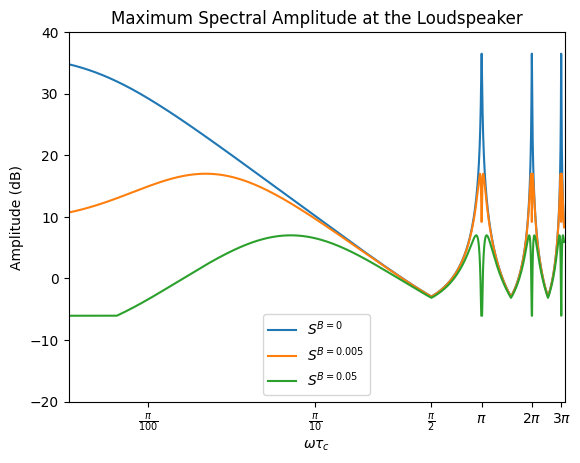

In [6]:
Bs = [0, 0.005, 0.05]

for B in Bs:
    S_b_hat = np.maximum(
        np.sqrt(g**2 + 2 * g * np.cos(w * tc) + 1) / (g**2 + 2 * g * np.cos(w * tc) + B + 1), # in-phase
        np.sqrt(g**2 - 2 * g * np.cos(w * tc) + 1) / (g**2 - 2 * g * np.cos(w * tc) + B + 1)  # out-of-phase
    )  # Maximum spectral amplitude at the loudspeaker

    plt.plot(w * tc, 20 * np.log10(S_b_hat), label=f'$S^{{B={B}}}$')

plt.title('Maximum Spectral Amplitude at the Loudspeaker')

plt.xlabel(r'$\omega \tau_c$')
plt.ylabel('Amplitude (dB)')
plt.legend()

plt.xlim(np.pi / 300, np.pi * np.pi)
plt.ylim(-20, 40)

plt.xscale('log')
x_ticks = [np.pi / 100, np.pi / 10, np.pi / 2, np.pi, 2 * np.pi, 3 * np.pi]
x_labels = [r'$\frac{\pi}{100}$', r'$\frac{\pi}{10}$', r'$\frac{\pi}{2}$', r'$\pi$', r'$2\pi$', r'$3\pi$']
plt.xticks(x_ticks, x_labels)
plt.minorticks_off()

plt.show()

$$
\begin{align}
z &= e^{i2wt} \\
H^{|B|}_{LL}(z) = H^{|B|}_{RR}(z) &= \frac{z^2g^2-z(B+1)}{z^2g^2+g^2-z[(g^2+B)^2+2B+1]} \\
H^{|B|}_{LR}(z) = H^{|B|}_{RL}(z) &= \frac{z[gz^{\frac{1}{2}}-g(g^2+B)z^{\frac{1}{2}}]}{z^2g^2+g^2-z[(g^2+B)^2+2B+1]} \\
\end{align}
$$